# Exploring NYC - Analysis of Crime Data in New York City

### Issue: Do the different boroughs have significant differences in terms of crime level and crime type?
Medium: https://medium.com/@a1080211jeff/exploring-nyc-analysis-of-crime-data-in-new-york-city-6134642b9833

### Data & Package
I use the NYPD Complaint Data Current (Year To Date) to do the exploratory analysis. This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) for all 2018 (includes any crime reports)

- NYPD Complaint Data Current (Year To Date)
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

- NYPD Complaint Data Historic
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib as plt
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
import re
import os
print('\n'.join(os.listdir('../NYPDProject')))

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 3.0.2
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.1
-------------------------
.ipynb_checkpoints
Featuretools Practice.ipynb
level of crime at each borough.PNG
NYC Crime analysis for Github
NYPD project 1.0.ipynb
NYPD project 1.1.ipynb
NYPDVisualization.twb
NYPD_Complaint_Data_2018.csv
NYPD_Complaint_Data_2018clean.csv
NYPD_Complaint_Data_Current__Year_To_Date_.csv
NYPD_Complaint_Data_Historic.csv
NYPD_resids_table.csv
Population.xlsx
total number of crime.PNG


In [ ]:
## These codes are for generating year 2018 only data 

# data = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
# alldata = pd.read_csv('NYPD_Complaint_Data_Historic.csv').dropna(subset=['CMPLNT_FR_DT']) #drop rows which have nan in date
# alldata['year'] = alldata['CMPLNT_FR_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
# df = alldata[alldata['year'] == '2018']
# df.to_csv('../NYPDProject/NYPD_Complaint_Data_2018')

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_2018.csv')

print('Complete df!')

Complete df!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452997 entries, 0 to 452996
Data columns (total 37 columns):
Unnamed: 0           452997 non-null int64
CMPLNT_NUM           452997 non-null int64
CMPLNT_FR_DT         452997 non-null object
CMPLNT_FR_TM         452997 non-null object
CMPLNT_TO_DT         389728 non-null object
CMPLNT_TO_TM         389976 non-null object
ADDR_PCT_CD          452994 non-null float64
RPT_DT               452997 non-null object
KY_CD                452997 non-null int64
OFNS_DESC            452991 non-null object
PD_CD                452715 non-null float64
PD_DESC              452715 non-null object
CRM_ATPT_CPTD_CD     452997 non-null object
LAW_CAT_CD           452997 non-null object
BORO_NM              452711 non-null object
LOC_OF_OCCUR_DESC    369411 non-null object
PREM_TYP_DESC        451109 non-null object
JURIS_DESC           452997 non-null object
JURISDICTION_CODE    452715 non-null float64
PARKS_NM             3987 non-null object
HADEVELOPT 

### First Look of the Data
First of all, I would take a good look of the data and make some very first impression about how I would like to proceed (I used the Columns Description on the website to understand each column's function). Since this is the study about the difference between borough, I would say that any useless or redundant variable would be emitted at the first place. 
1. WHEN & WHERE: Borough / Location / Time
2. WHAT & HOW: Crime Type / Description

I found out this dataset has very clearly imply which crime happened at which borough (BORO_NM), so I would only neglect any randomly-generated data (CMPLNT_NUM). 

In [4]:
# df.info()
df = df.drop('CMPLNT_NUM', axis=1)

## Data Cleaning

#### Dealing with NaN data
Since some of the columns are pretty important for the analysis (e.g. borough, description...), I dropped the entire rows which miss any crucial value. It is worth mention that some specific variables don't necessarily have the value for each row (like PARKS_NM means the park or public place nearby where crime happened.) so I would leave those row which have nan data in certain columns alone (These include CMPLNT_TO_DT, CMPLNT_TO_TM, PARKS_NM, HADEVELOPT, HOUSING_PSA, LOC_OF_OCCUR_DESC, TRANSIT_DISTRICT, STATION_NAME).
p.s. The data about suspect seems that has lots of missing data (SUSP_AGE_GROUP, SUSP_RACE, SUSP_SEX). Thought I am not sure about the reason (could those be the cases that haven't been solved?), I would keep those rows for now.

In [5]:
#drop rows which miss important data in some columns
df = df.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM',
 'ADDR_PCT_CD',
 'RPT_DT',
 'KY_CD',
 'OFNS_DESC',
 'PD_CD',
 'PD_DESC',
 'CRM_ATPT_CPTD_CD',
 'LAW_CAT_CD',
 'BORO_NM',
 'PREM_TYP_DESC',
 'JURIS_DESC',
 'JURISDICTION_CODE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lat_Lon',
 'PATROL_BORO',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'VIC_SEX',])
# df.columns.tolist()
# df.info() #now only 451064 rows, meaning the cleaning dropped about 0.4% of original rows

#### About Crime type
OFNS_DESC & PD_DESC are both variable about the crime type (Description of offense). According to description from the website, PD_DESC would be the more "granular" one, and OFNS_DESC would be more general (PD_DESC has 339 unique values and OFNS_DESC has 59). So I would first try OFNS_DESC as type of crime.

At first, it was a little confused at first when browsing through all the type of crime. There are some type with number or '&' (e.g. HARRASSMENT 2, ASSAULT 3 & RELATED OFFENSES) and I was worried if I should do some strings adjustment. However, after I closely read and compare with some types, I found out that 59 Types of unique values and there are only few of them has very few occurrence (This condition doesn't seems wrong to me. e.g. HOMICIDE-NEGLIGENT-VEHICLE & DISRUPTION OF A RELIGIOUS SERV are the crime that rarely happens). Also, I have found other state crime report, and it shows the similar category and number of unique type of crime. (https://www.michigan.gov/documents/msp/a_CrimeAtAGlance_661287_7.pdf)

p.s. Interestingly, there are some crime events are assigned as the same type, but they are assigned in different levels (e.g. row 164 & 350 are both weapon in the type of crime but one is Felony and one is Misdemeanor).

In [8]:
print('--PD_DESC--')
print(df['PD_DESC'].value_counts().head(10))
print(df.groupby('LAW_CAT_CD')['PD_DESC'].agg('nunique'))
print('Amount of Unique Category: ', sum(df.groupby('PD_DESC')['PD_DESC'].agg('nunique')))

print('--OFNS_DESC--')
print(df['OFNS_DESC'].value_counts().head(10))
print(df.groupby('LAW_CAT_CD')['OFNS_DESC'].agg('nunique'))
print('Amount of Unique Category: ', sum(df.groupby('OFNS_DESC')['OFNS_DESC'].agg('nunique')))

print('    ')
# double check either one of them has the same amount of each crime level
print('--double check either one of them has the same amount of each crime level--')
print(df.groupby('LAW_CAT_CD')['PD_DESC'].agg('count'))
print(df.groupby('LAW_CAT_CD')['OFNS_DESC'].agg('count'))

--PD_DESC--
HARASSMENT,SUBD 3,4,5               50407
ASSAULT 3                           42716
LARCENY,PETIT FROM STORE-SHOPL      31553
LARCENY,PETIT FROM BUILDING,UN      19234
HARASSMENT,SUBD 1,CIVILIAN          18602
AGGRAVATED HARASSMENT 2             18492
ASSAULT 2,1,UNCLASSIFIED            15361
MISCHIEF, CRIMINAL 4, OF MOTOR      13610
CRIMINAL MISCHIEF,UNCLASSIFIED 4    11865
LARCENY,PETIT FROM AUTO             11076
Name: PD_DESC, dtype: int64
LAW_CAT_CD
FELONY         197
MISDEMEANOR    126
VIOLATION       21
Name: PD_DESC, dtype: int64
Amount of Unique Category:  339
--OFNS_DESC--
PETIT LARCENY                     84465
HARRASSMENT 2                     69009
ASSAULT 3 & RELATED OFFENSES      52770
CRIMINAL MISCHIEF & RELATED OF    46260
GRAND LARCENY                     40908
FELONY ASSAULT                    20080
OFF. AGNST PUB ORD SENSBLTY &     19805
DANGEROUS DRUGS                   15157
MISCELLANEOUS PENAL LAW           12970
ROBBERY                           1285

In [1]:
## Double Check
# len(df.groupby('OFNS_DESC')['OFNS_DESC'].agg('count')) #59 correct
# sum(df.groupby('LAW_CAT_CD')['OFNS_DESC'].agg('nunique')) #70

## Data Cleaning: Preprocessing Text about Crime Type
### Re-categorize Crime Description to Crime Type
Up till now, I have found that inconsistent type of crime is not suitable for further analysis. If I transform those crime description into more general language (e.g. 'HARRASSMENT 2' to 'Harassment', 'DANGEROUS DRUGS' to 'Illegal Drugs') and narrow down the amount of unique category, then the exploratory analysis would be more clear and straight forward. 

These data represent criminal offenses according to New York State Penal Law definitions, not FBI Uniform Crime Report definitions, and are therefore not comparable to UCR reported crime.

I had a serious challenge that there is no single standard definition of violent crime. There are two standards, NCVS Bureau of Justice Statistics National Crime Victimization Survey and the UCR Federal Bureau of Investigation’s Uniform Crime Report, and they were not fully compatible with the description of the NYPD.

### What rule to follow? 
The U.S. Department of Justice administers two statistical programs to measure the magnitude, nature, and impact of crime in the Nation:  the Uniform Crime Reporting (UCR) Program and the National Crime Victimization Survey (NCVS).  Each of these programs produces valuable information about aspects of the Nation’s crime problem.  Because the UCR and NCVS programs are conducted for different purposes, use different methods, and focus on somewhat different aspects of crime, the information they produce together provides a more comprehensive panorama of the Nation’s crime problem than either could produce alone.

#### Comparing UCR and the NCVS
Because of methodology, the NCVS and UCR definitions of some crimes differ.  For example, the UCR defines burglary as the unlawful entry or attempted entry of a structure to commit a felony or theft.  The NCVS, not wanting to ask victims to ascertain offender motives, defines burglary as the entry or attempted entry of a residence by a person who had no right to be there.

#### Compromising: Create the New Category System
Since the NYPD data represents criminal offenses according to New York State Penal Law definitions, not FBI UCR and NCVS definitions, it seems that I should create a more straight-forward category system. This new type of crime system should help average residents understand the data and even help government administration or any analyst easily interpret the data.

#### New Category

- Sex crime =  'SEX CRIMES', 'RAPE'
- Harrasment = 'HARRASSMENT 2'
- Assault = 'ASSAULT 3 & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON', 'KIDNAPPING & RELATED OFFENSES', 'JOSTLING', 'KIDNAPPING', 'ANTICIPATORY OFFENSES'
- Criminal Mischief (Property) = 'CRIMINAL MISCHIEF & RELATED OF', 'THEFT OF SERVICES'
- Offenses against Public Order/Administration = 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY'
- Criminal Possession of a Controlled Substance = 'DANGEROUS DRUGS'
- Criminal Possession of a Weapon = 'DANGEROUS WEAPONS', 'UNLAWFUL POSS. WEAP. ON SCHOOL'

- Traffic Laws Violations = 'VEHICLE AND TRAFFIC LAWS', 'UNAUTHORIZED USE OF A VEHICLE'
- Forgery = 'FORGERY'
- Driving under the Influence = 'INTOXICATED & IMPAIRED DRIVING'
- Murder = 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT-VEHICLE'
- Robbery = 'ROBBERY'
- Aggravated assault = 'FELONY ASSAULT' 
- Burglary = 'BURGLARY', 'CRIMINAL TRESPASS', 'BURGLAR'S TOOLS'
- Larceny Theft = 'PETIT LARCENY', 'GRAND LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'OTHER OFFENSES RELATED TO THEF'
- Frauds = 'FRAUDS', 'THEFT-FRAUD', 'OFFENSES INVOLVING FRAUD', 'FRAUDULENT ACCOSTING'
- Motor Vehicle Theft = 'PETIT LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY OF MOTOR VEHICLE'
- Arson = 'ARSON'
- Gambling = 'GAMBLING', 'LOITERING/GAMBLING (CARDS, DIC'

- Other = 'ADMINISTRATIVE CODE', 'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'OTHER STATE LAWS', 'ESCAPE 3', 'MISCELLANEOUS PENAL LAW'
- Social/Commercial-related Crime = 'ENDAN WELFARE INCOMP', 'CHILD ABANDONMENT/NON SUPPORT', 'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV', 'ABORTION', 'PROSTITUTION & RELATED OFFENSES', 'OFFENSES RELATED TO CHILDREN', 'DISORDERLY CONDUCT', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ALCOHOLIC BEVERAGE CONTROL LAW'


In [7]:
new_type_name = [
'Sex_Crime',
'Harrasment',
'Assault',
'Criminal_Mischief_Property',
'Offenses_against_Public_Order_Administration',
'Criminal_Possession_of_a_Controlled Substance',
'Criminal_Possession_of_a_Weapon',
'Traffic_Laws_Violations',
'Forgery',
'Driving_under_the_Influence',
'Murder',
'Robbery',
'Aggravated_Assault',
'Burglary',
'Larceny_Theft',
'Frauds',
'Motor_Vehicle_Theft',
'Arson',
'Gambling',
'Social_Commercial_related_Crime',
'Other']

Sex_Crime = 'Sex_Crime'
Harrasment = 'Harrasment'


Sex_Crime = ['SEX CRIMES', 'RAPE']
Harassment = ['HARRASSMENT 2']
Assault = ['ASSAULT 3 & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON', 'KIDNAPPING & RELATED OFFENSES', 'JOSTLING', 'KIDNAPPING', 'ANTICIPATORY OFFENSES']
Criminal_Mischief_Property = ['CRIMINAL MISCHIEF & RELATED OF', 'THEFT OF SERVICES']
Offenses_against_Public_Order_Administration = ['OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY']
Criminal_Possession_of_a_Controlled_Substance = ['DANGEROUS DRUGS']
Criminal_Possession_of_a_Weapon = ['DANGEROUS WEAPONS', 'UNLAWFUL POSS. WEAP. ON SCHOOL']
Traffic_Laws_Violations = ['VEHICLE AND TRAFFIC LAWS', 'UNAUTHORIZED USE OF A VEHICLE']
Forgery = ['FORGERY']
Driving_under_the_Influence = ['INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING']
Murder = ['HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT-VEHICLE']
Robbery = ['ROBBERY']
Aggravated_Assault = ['FELONY ASSAULT']
Burglary = ['BURGLARY', 'CRIMINAL TRESPASS', "BURGLAR'S TOOLS"]
Larceny_Theft = ['PETIT LARCENY', 'GRAND LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'OTHER OFFENSES RELATED TO THEF']
Frauds = ['FRAUDS', 'THEFT-FRAUD', 'OFFENSES INVOLVING FRAUD', 'FRAUDULENT ACCOSTING']
Motor_Vehicle_Theft = ['PETIT LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY OF MOTOR VEHICLE']
Arson = ['ARSON']
Gambling = ['GAMBLING', 'LOITERING/GAMBLING (CARDS, DIC']
Other = ['ADMINISTRATIVE CODE', 'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'OTHER STATE LAWS', 'ESCAPE 3', 'MISCELLANEOUS PENAL LAW']
Social_Commercial_related_Crime = ['ENDAN WELFARE INCOMP', 'CHILD ABANDONMENT/NON SUPPORT', 'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV', 'ABORTION', 'PROSTITUTION & RELATED OFFENSES', 'OFFENSES RELATED TO CHILDREN', 'DISORDERLY CONDUCT', "AGRICULTURE & MRKTS LAW-UNCLASSIFIED", 'ALCOHOLIC BEVERAGE CONTROL LAW']

new_type_cat = [
    Sex_Crime,
    Harassment,
    Assault,
    Criminal_Mischief_Property,
    Offenses_against_Public_Order_Administration,
    Criminal_Possession_of_a_Controlled_Substance,
    Criminal_Possession_of_a_Weapon,
    Traffic_Laws_Violations,
    Forgery,
    Driving_under_the_Influence,
    Murder,
    Robbery,
    Aggravated_Assault,
    Burglary,
    Larceny_Theft,
    Frauds,
    Motor_Vehicle_Theft,
    Arson,
    Gambling,
    Social_Commercial_related_Crime,
    Other]

In [8]:
# Here is the process of re-categorize the type of crime
#This two would generate the same dict
new_dic = {}
for old_cat, str_name in zip(new_type_cat, new_type_name):
    for a, b in zip(old_cat, [str_name]*len(old_cat)):
        new_dic.update([(a, b)])
    
new_dic = {a: b for old_cat, str_name in zip(new_type_cat, new_type_name) for a, b in zip(old_cat, [str_name]*len(old_cat))}
new_dic

# https://stackoverflow.com/questions/2553354/simpler-way-to-create-dictionary-of-separate-variables

{'SEX CRIMES': 'Sex_Crime',
 'RAPE': 'Sex_Crime',
 'HARRASSMENT 2': 'Harrasment',
 'ASSAULT 3 & RELATED OFFENSES': 'Assault',
 'OFFENSES AGAINST THE PERSON': 'Assault',
 'KIDNAPPING & RELATED OFFENSES': 'Assault',
 'JOSTLING': 'Assault',
 'KIDNAPPING': 'Assault',
 'ANTICIPATORY OFFENSES': 'Assault',
 'CRIMINAL MISCHIEF & RELATED OF': 'Criminal_Mischief_Property',
 'THEFT OF SERVICES': 'Criminal_Mischief_Property',
 'OFF. AGNST PUB ORD SENSBLTY &': 'Offenses_against_Public_Order_Administration',
 'OFFENSES AGAINST PUBLIC ADMINI': 'Offenses_against_Public_Order_Administration',
 'OFFENSES AGAINST PUBLIC SAFETY': 'Offenses_against_Public_Order_Administration',
 'DANGEROUS DRUGS': 'Criminal_Possession_of_a_Controlled Substance',
 'DANGEROUS WEAPONS': 'Criminal_Possession_of_a_Weapon',
 'UNLAWFUL POSS. WEAP. ON SCHOOL': 'Criminal_Possession_of_a_Weapon',
 'VEHICLE AND TRAFFIC LAWS': 'Traffic_Laws_Violations',
 'UNAUTHORIZED USE OF A VEHICLE': 'Traffic_Laws_Violations',
 'FORGERY': 'Forgery'

In [9]:
#apply this dict to to df to create new categorial variable

df['new_category'] = None
df['new_category'] = df['OFNS_DESC'].map(new_dic)

# check for no NaN value
# df['new_category'].value_counts(dropna=False)
# df[df['new_category'].isnull()]
# https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe

In [ ]:
## Experiment (same result)

# dict_t={i: new_type_name[i] for i in range(0,len(new_type_name))}
# dict_t2 = dict()
# for key, value in list(dict_t.items()):
#     dict_t2[value]=dict_t[key]
# dict_t2 = {new_type_name[i]: new_type_name[i] for i in range(0, len(new_type_name))}

In [ ]:
## Experiment
#quicker way to do assign new variable
# dict_ttt = {'Sex_Crime': ['SEX CRIMES', 'RAPE'],
#             'Harrasment': ['HARRASMENT 2']}

# locals().update(dict_ttt)
# Harrasment

# locals().update(dict_t2)
# Assault

### Exploratory Analysis
#### Total Number of Crime

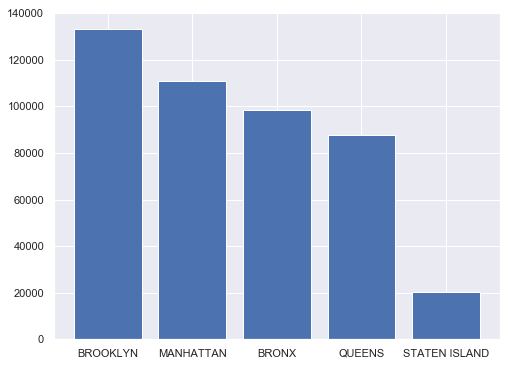

In [10]:
plt.figure(figsize=[8,6])
plt.bar(df['BORO_NM'].value_counts().index.tolist(), df['BORO_NM'].value_counts().values)
plt.savefig('total number of crime.PNG')

#### New thing: crime per resident
To get a clearer image of crime, I use the estimated population by borough to count the crime rate

p.s. The crime rate is a measure of the number of all kinds of recorded crime events for every 100,000 people in a given year.

data source: https://www1.nyc.gov/site/planning/planning-level/nyc-population/current-future-populations.page

- Bronx: 1,432,132
- Brooklyn: 2,582,830
- Manhattan: 1,628,701
- Queens: 2,278,906
- Staten Island: 476,179

<BarContainer object of 5 artists>

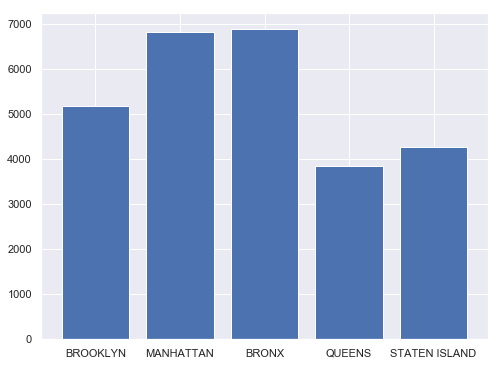

In [11]:
resident_dict = {'Bronx': 1432132, 'Manhattan': 1628701, 'Brooklyn': 2582830, 'Queens': 2278906, 'Staten Island': 476179}
resident_list = [2582830, 1628701, 1432132, 2278906, 476179]
count_table = df['BORO_NM'].value_counts()
count_table

crime_rate_table = count_table / resident_list * 100000

plt.figure(figsize=[8,6])
plt.bar(crime_rate_table.index.tolist(), crime_rate_table.values)
# plt.savefig('total number of crime.PNG')

#### About Crime Level in each borough
I broke down to more detail on the same graphic and also show the distribution of each crime level in different district. 

LAW_CAT_CD     FELONY  MISDEMEANOR  VIOLATION     All
BORO_NM                                              
BRONX           26089        56464      16084   98637
BROOKLYN        42439        70198      20725  133362
MANHATTAN       34416        62465      14169  111050
QUEENS          27617        45839      14265   87721
STATEN ISLAND    4607        11204       4483   20294
All            135168       246170      69726  451064


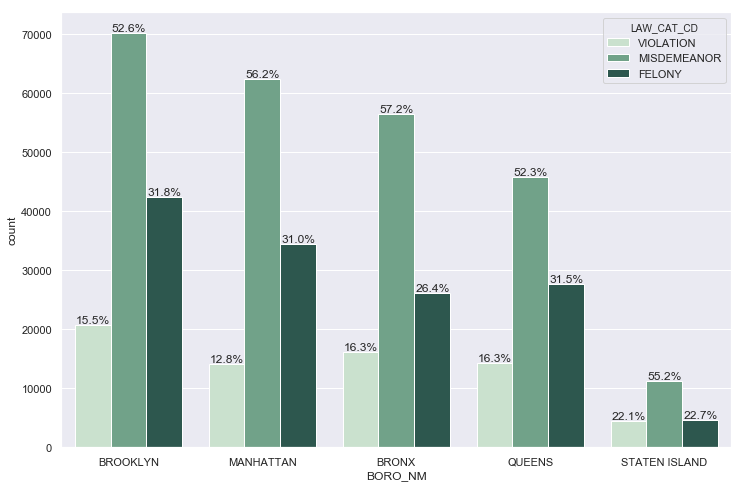

In [12]:
# tabulate a two way table with variables as boroughs and level of crime
two_way_table = pd.crosstab(index=df["BORO_NM"], columns=df["LAW_CAT_CD"], margins=True)
print(two_way_table)

boro_name = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
crime_level = ['VIOLATION', 'MISDEMEANOR', 'FELONY']
subtotal_boro = df.groupby('BORO_NM')['LAW_CAT_CD'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="BORO_NM", hue="LAW_CAT_CD", 
                   data=df[['BORO_NM', 'LAW_CAT_CD']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")

# boro_num = [val for val in range(0, 5) for _ in (0, 1, 2)] #[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4] not work!
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), ha='center', size=12)

plt.savefig('level of crime at each borough.PNG')

##### About Crime type in each borough
###### Crime type in each borough
I dug in crime type a little more into each borough level. I listed top 5 crime type in each borough, and it seems that there is no major difference among each borough. In each borough, major types of crime are all about Larceny_Theft, Harassment, Assault, Criminal_Mischief_Property and Offenses_against_Public_Order_Administration. The only difference happens in Staten Island, which has significantly lower-proportion of Larceny_Theft and Criminal_Mischief_Property

In [22]:
boro_crime_type = df.groupby(['BORO_NM', 'new_category'])['year'].agg('count').rename(columns={'year': 'Count'})
for boro in boro_name:
    _ = boro_crime_type.loc[boro].sort_values(ascending=False)[0:5].rename(index={'new_category': boro})
    _.index.names = [boro]
    print('---')
    print(_)
    
# similar solution
# for name, data in df.groupby('BORO_NM'):
#     print(data.groupby('new_category')['year'].agg(['count']).sort_values(by='count', ascending=False).rename(index={'new_category': name})[0:5])
    
# same result
# boro_crime_type = df[['BORO_NM', 'OFNS_DESC', 'year']].groupby(['BORO_NM', 'OFNS_DESC']).agg('count').rename(columns={'year': 'Count'})
# for boro in boro_name:
#     _ = boro_crime_type.loc[boro].sort_values(by='Count', ascending=False)[0:10].rename(index={'OFNS_DESC': boro})
#     _.index.names = [boro]
#     print(_)

for boro in boro_name:
    _ = list(boro_crime_type.loc[boro].sort_values(ascending=False)[0:5].index)
    print(_)

---
MANHATTAN
Larceny_Theft                                   43602
Harrasment                                      13983
Assault                                         11226
Criminal_Mischief_Property                       9493
Offenses_against_Public_Order_Administration     6346
dtype: int64
---
BROOKLYN
Larceny_Theft                                   35184
Harrasment                                      20462
Assault                                         15312
Criminal_Mischief_Property                      14350
Offenses_against_Public_Order_Administration     7610
dtype: int64
---
QUEENS
Larceny_Theft                                   23611
Harrasment                                      14129
Assault                                         10748
Criminal_Mischief_Property                       9827
Offenses_against_Public_Order_Administration     4883
dtype: int64
---
BRONX
Larceny_Theft                                   21663
Harrasment                                      1

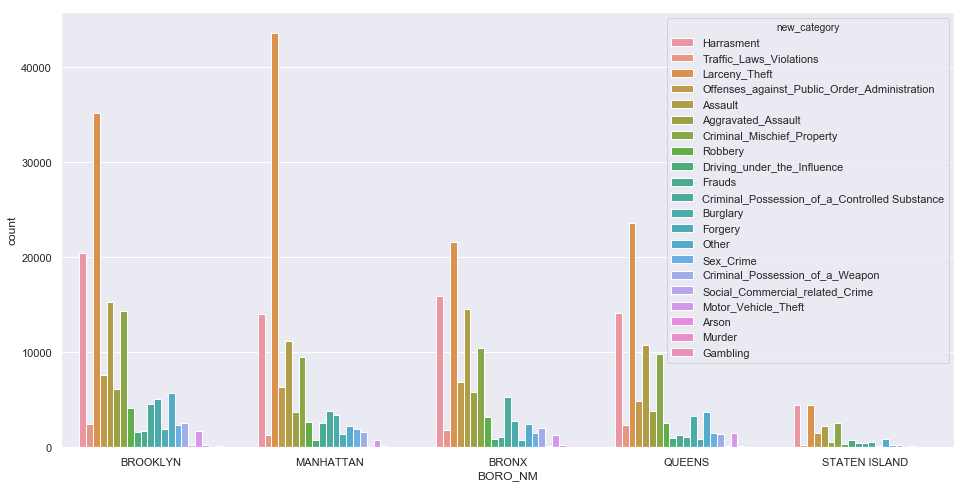

In [23]:
fig = plt.figure(figsize=[16,8])
ax = sns.countplot(x="BORO_NM", hue="new_category", 
                   data=df[['BORO_NM', 'new_category']], 
                   order = subtotal_boro.index)
## How to show only top 10 class in each bigger class?
## and how to do show proportion of this information? (how to do pie chart?)

In [13]:
order = df.pivot_table(index='BORO_NM', columns='new_category', aggfunc=np.sum)
order = order.reindex(order['ADDR_PCT_CD'].sort_values(by='Aggravated_Assault', ascending=False).index)
order

ADDR_PCT_CD                                \
new_category  Aggravated_Assault    Arson    Assault  Burglary   
BORO_NM                                                          
BROOKLYN                455150.0  16080.0  1129107.0  377983.0   
QUEENS                  411772.0  14303.0  1161961.0  354823.0   
BRONX                   260175.0   8866.0   655847.0  126706.0   
MANHATTAN                80559.0   2785.0   216359.0   59797.0   
STATEN ISLAND            71676.0   2668.0   273740.0   61308.0   

                                          \
new_category  Criminal_Mischief_Property   
BORO_NM                                    
BROOKLYN                       1064605.0   
QUEENS                         1058907.0   
BRONX                           472265.0   
MANHATTAN                       192765.0   
STATEN ISLAND                   304160.0   

                                                             \
new_category  Criminal_Possession_of_a_Controlled Substance   
BORO_NM                                                       
BROOKLYN                                           333316.0   
QUEENS                                             115416.0   
BRONX                                              236590.0   
MANHATTAN                                           76613.0   
STATEN ISLAND                                       56813.0   

                                                                           \
new_category  Criminal_Possession_of_a_Weapon Driving_under_the_Influence   
BORO_NM                                                                     
BROOKLYN                             185554.0                    117051.0   
QUEENS                               147183.0                    111271.0   
BRONX                                 94610.0                     38889.0   
MANHATTAN                             32250.0                     17054.0   
STATEN ISLAND                         34404.0                     89902.0   

                                            ...                  year  \
new_category    Forgery    Frauds           ...            Harrasment   
BORO_NM                                     ...                         
BROOKLYN       139989.0  127308.0           ...            41292316.0   
QUEENS          92956.0  141039.0           ...            28512322.0   
BRONX           35830.0   48145.0           ...            32245622.0   
MANHATTAN       26482.0   42629.0           ...            28217694.0   
STATEN ISLAND   11495.0   60185.0           ...             8992208.0   

                                                          \
new_category  Larceny_Theft Motor_Vehicle_Theft   Murder   
BORO_NM                                                    
BROOKLYN         71001312.0           3424546.0  12108.0   
QUEENS           47646998.0           3057270.0   6054.0   
BRONX            43715934.0           2619364.0   4036.0   
MANHATTAN        87988836.0           1450942.0   4036.0   
STATEN ISLAND     8921578.0            371312.0   2018.0   

                                                                        \
new_category  Offenses_against_Public_Order_Administration       Other   
BORO_NM                                                                  
BROOKLYN                                        15356980.0  11460222.0   
QUEENS                                           9853894.0   7474672.0   
BRONX                                           13914110.0   4861362.0   
MANHATTAN                                       12806228.0   4607094.0   
STATEN ISLAND                                    3137990.0   1683012.0   

                                                                     \
new_category     Robbery  Sex_Crime Social_Commercial_related_Crime   
BORO_NM                                                               
BROOKLYN       8348466.0  4691850.0                        427816.0   
QUEENS         5073252.0  3081486.0                        179602.0   
BRO

### Statistics: If boroughs' frequencies of crime in each levels are different among each other or not?
After fair amount of exploratory analysis, I used statistics to answer the following question:
If each borough's frequency of crime in each levels are statistically different from each other?

To compare the distribution of level of type in each borough, Chi-squared test can be used (chi-squared for test of independence). First of all, Let's build the contingency table.

In [14]:
two_way_table = pd.crosstab(index=df["BORO_NM"], columns=df["LAW_CAT_CD"])
two_way_table

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
BORO_NM,,,
BRONX,26089,56464,16084
BROOKLYN,42439,70198,20725
MANHATTAN,34416,62465,14169
QUEENS,27617,45839,14265
STATEN ISLAND,4607,11204,4483


####  Chi-squared test - Crime Level

The test result (p=0.00) shows there is a significant relationship between the variables, meaning different boroughs has different distribution of level of crime. With the table of standardized residuals, I could see that most of the real data is distinctly different from the expected value.

In [15]:
import scipy.stats as stats
import statsmodels.api as sm
result_chi = stats.chi2_contingency(observed = two_way_table)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table)

print('chi-square statistic :', result_chi[0])
print('p-value :', result_chi[1])
print('degrees of freedom :', result_chi[2])
print('expected counts : \n', result_chi[3])

table = sm.stats.Table(two_way_table)
table.standardized_resids

# stats.mstats.zscore(two_way_table, ddof = 1) # seems like z score is wierd
#How to figure it out which row has the most significant distribution and which doesn't?

chi-square statistic : 2573.5931507705345
p-value : 0.0
degrees of freedom : 8
expected counts : 
 [[29558.03614565 53831.54117819 15247.42267616]
 [39963.89606796 72782.85019421 20615.25373783]
 [33277.77521593 60605.9860685  17166.23871557]
 [26286.89526985 47874.09008478 13560.01464537]
 [ 6081.3973006  11075.53247433  3137.07022507]]


LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
BORO_NM,,,
BRONX,-27.277374,19.045051,8.335975
BROOKLYN,17.628512,-16.938869,0.990532
MANHATTAN,8.587537,12.904763,-28.656192
QUEENS,10.922546,-15.376182,7.336260
STATEN ISLAND,-23.118317,1.853369,26.743650


In [16]:
stats.mstats.zscore(two_way_table, ddof = 1)

array([[-0.06696045,  0.31370887,  0.36123207],
       [ 1.09205217,  0.90962554,  1.14507256],
       [ 0.52332078,  0.57409156,  0.03779864],
       [ 0.04135584, -0.14730866,  0.05401254],
       [-1.58976835, -1.65011732, -1.59811581]])

####  Chi-squared test - Crime Category

The test for crime category result (p=0.00) shows there is a significant relationship between the variables, meaning different boroughs has different distribution of level of crime. With the table of standardized residuals, I could see that most of the real data is distinctly different from the expected value.

Therefore, I could further confirm a few things:
1. Bronx has significantly crimes about serious assault (Aggravated_Assault), assault, drug problem, weapon problem, Harassment, Offenses_against_Public_Order_Administration & Robbery. However, Bronx has significantly lower high-value theft incidents (Larceny_Theft) & Burglary than other boroughs.
2. Brooklyn has significantly crimes about Burglary, weapon problem, Forgery, Gambling, Robbery, Sex Crime, Social_Commercial_related_Crime. However, Brooklyn has significantly lower Assault, Frauds, high-value theft incidents (Larceny_Theft), Offenses_against_Public_Order_Administration than other boroughs.
3. Manhattan has significantly crimes about Forgery, Sex_Crime, Frauds, high-value theft incidents (Larceny_Theft). However, Manhattan has significantly lower Assault, serious assault (Aggravated_Assault), Arson, Criminal_Mischief_Property, weapon problem, Driving_under_the_Influence, Harassment, Motor_Vehicle_Theft, Offenses_against_Public_Order_Administration, Robbery, Social_Commercial_related_Crime, Traffic_Laws_Violations than other boroughs.
4. Queens has significantly crimes about Assault, Burglary, Criminal_Mischief_Property, Harassment, Motor_Vehicle_Theft & Traffic_Laws_Violations. However, Queens has significantly lower drug problem, weapon problem, Forgery, Frauds, Gambling, high-value theft incidents (Larceny_Theft), Offenses_against_Public_Order_Administration.
5. Staten Island has significantly crimes about Criminal_Mischief_Property, Driving_under_the_Influence, Frauds, Harassment, Offenses_against_Public_Order_Administration. However, Staten Island has significantly lower serious assault (Aggravated_Assault), Assault, Burglary, drug problem, weapon problem, Gambling, high-value theft incidents (Larceny_Theft), Motor_Vehicle_Theft, Robbery, Sex_Crime, Social_Commercial_related_Crime, Traffic_Laws_Violations.

In [18]:
two_way_table2 = pd.crosstab(index=df["BORO_NM"], columns=df["new_category"])
two_way_table2

new_category,Aggravated_Assault,Arson,Assault,Burglary,Criminal_Mischief_Property,Criminal_Possession_of_a_Controlled Substance,Criminal_Possession_of_a_Weapon,Driving_under_the_Influence,Forgery,Frauds,...,Harrasment,Larceny_Theft,Motor_Vehicle_Theft,Murder,Offenses_against_Public_Order_Administration,Other,Robbery,Sex_Crime,Social_Commercial_related_Crime,Traffic_Laws_Violations
BORO_NM,,,,,,,,,,,,,,,,,,,,,
BRONX,5770,201,14524,2796,10423,5247,2078,844,788,1068,...,15979,21663,1298,2,6895,2409,3192,1481,116,1853
BROOKLYN,6148,215,15312,5050,14350,4579,2537,1613,1918,1733,...,20462,35184,1697,6,7610,5679,4137,2325,212,2492
MANHATTAN,3749,126,11226,3426,9493,3797,1619,760,1362,2508,...,13983,43602,719,2,6346,2283,2692,1945,81,1293
QUEENS,3820,134,10748,3286,9827,1065,1354,1023,853,1301,...,14129,23611,1515,3,4883,3704,2514,1527,89,2331
STATEN ISLAND,593,22,2265,507,2509,469,285,741,95,496,...,4456,4421,184,1,1555,834,323,270,8,260


In [19]:
result_chi2 = stats.chi2_contingency(observed = two_way_table2)
chi2, p, dof, expected = stats.chi2_contingency(observed = two_way_table2)

print('chi-square statistic :', result_chi2[0])
print('p-value :', result_chi2[1])
print('degrees of freedom :', result_chi2[2])
print('expected counts : \n', result_chi2[3])

table2 = sm.stats.Table(two_way_table2)
table2.standardized_resids

chi-square statistic : 18755.255958297566
p-value : 0.0
degrees of freedom : 80
expected counts : 
 [[4.39101981e+03 1.52636047e+02 1.18249201e+04 3.29435824e+03
  1.01907523e+04 3.31447646e+03 1.72163839e+03 1.08922658e+03
  1.09688025e+03 1.55391368e+03 3.38948242e+01 1.50906318e+04
  2.80957478e+04 1.18369473e+03 3.06146800e+00 5.96745715e+03
  3.26024474e+03 2.81173968e+03 1.65056860e+03 1.10650200e+02
  1.79948715e+03]
 [5.93687140e+03 2.06371326e+02 1.59878646e+04 4.45413185e+03
  1.37783905e+04 4.48133266e+03 2.32773847e+03 1.47268707e+03
  1.48303521e+03 2.10096654e+03 4.58274436e+01 2.04032649e+04
  3.79868115e+04 1.60041259e+03 4.13925297e+00 8.06829101e+03
  4.40800875e+03 3.80160819e+03 2.23164867e+03 1.49604429e+02
  2.43299376e+03]
 [4.94360889e+03 1.71844572e+02 1.33130304e+04 3.70893765e+03
  1.14732102e+04 3.73158765e+03 1.93829845e+03 1.22630059e+03
  1.23491744e+03 1.74946637e+03 3.81603276e+01 1.69897164e+04
  3.16314648e+04 1.33265712e+03 3.44673927e+00 6.71843342e

new_category,Aggravated_Assault,Arson,Assault,Burglary,Criminal_Mischief_Property,Criminal_Possession_of_a_Controlled Substance,Criminal_Possession_of_a_Weapon,Driving_under_the_Influence,Forgery,Frauds,...,Harrasment,Larceny_Theft,Motor_Vehicle_Theft,Murder,Offenses_against_Public_Order_Administration,Other,Robbery,Sex_Crime,Social_Commercial_related_Crime,Traffic_Laws_Violations
BORO_NM,,,,,,,,,,,,,,,,,,,,,
BRONX,24.083632,4.420125,29.931729,-9.990681,2.749182,38.626646,9.799985,-8.452033,-10.608840,-14.055045,...,8.890393,-51.337216,3.779393,-0.659993,14.014011,-17.150836,8.229933,-4.761958,0.569385,1.439358
BROOKLYN,3.339732,0.695810,-6.785202,10.818601,6.130466,1.766987,5.209273,4.374120,13.524780,-9.644373,...,0.537158,-20.253143,2.888256,0.874932,-6.270964,23.193849,6.573498,2.370242,6.044242,1.434786
MANHATTAN,-20.018976,-4.033779,-22.204728,-5.442939,-22.484337,1.253856,-8.427821,-15.421521,4.184652,21.048650,...,-28.865661,91.671513,-19.477080,-0.892729,-5.398626,-26.824142,-9.836136,2.334161,-4.499797,-18.928061
QUEENS,-1.551645,-0.165342,2.683370,7.457800,9.442789,-39.298907,-5.086605,1.955186,-4.392722,-2.444699,...,7.402774,-11.464519,15.968606,0.181090,-6.690889,16.928842,0.303717,1.733156,-1.052809,20.535570
STATEN ISLAND,-10.808189,-1.646748,-3.725311,-6.821606,9.717634,-8.480908,-3.781862,35.534346,-8.926916,10.180694,...,26.938985,-21.663222,-3.906880,0.899307,9.853708,6.561215,-11.018579,-3.881802,-3.079125,-5.901762


In [33]:
## Creating the dataset for Tableua
resids_table = table2.standardized_resids
resids_table.to_csv('../NYPDProject/NYPD_resids_table.csv')

## The End
Thanks for your reading! Please feel free to contact me if there is something could be worked on more or you're interested in any of the project. Cheers! 

Jeff